## Task 1
#### Sayama 18.5

In [1]:
from pylab import *
import networkx as nx
import random as rd

%matplotlib inline

def initialize(n, p_e, p_i):
    global g
    g = nx.erdos_renyi_graph(n = n, p = p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < p_i else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    
def update(p_i, p_r):
    global g
    for a in g.nodes:
        if g.nodes[a]['state'] == 0: # if susceptible
            b = rd.choice(list(g.neighbors(a)))
            if g.nodes[b]['state'] == 1: # if neighbor b is infected
                g.nodes[a]['state'] = 1 if random() < p_i else 0
        else: # if infected
            g.nodes[a]['state'] = 0 if random() < p_r else 1

In [2]:
def simulate(n, p_e, p_i, p_r):
    
    initialize(n, p_e, p_i)
    for i in range(10):
        update(p_i, p_r)
    observe()

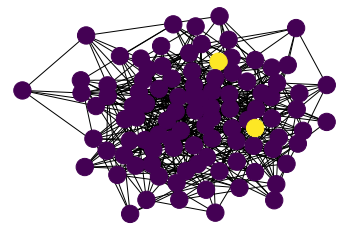

In [3]:
simulate(100, 0.1, 0.5, 0.5)

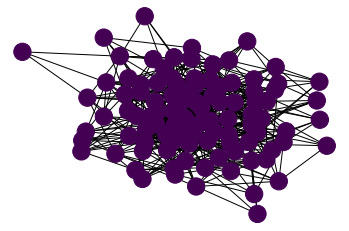

In [4]:
simulate(100, 0.1, 0.04, 0.5)

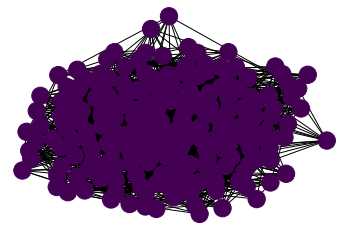

In [5]:
simulate(200, 0.1, 0.04, 0.5)

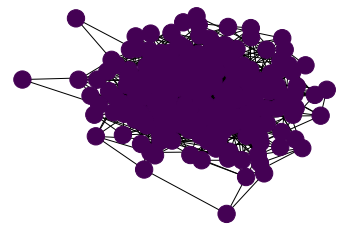

In [6]:
simulate(200, 0.05, 0.04, 0.5)

1. Synchronous updating makes a difference because it speeds up the evolution of the disease in the system: thus, the system reaches the equilibrium faster - in this case, the disease dying out.

2. It is also appropriate for the MFA because one of its assumptions is that all of the nodes in the system are the same, so their updates should also happen at the same time to preserve the probabilities of their transition from one state to another.

## Task 2
#### My friends have more friends than I do

In [29]:
nodes = 1000
edges = 20000
neighbors = 40
p_connection = neighbors/nodes

e_r_graph = nx.erdos_renyi_graph(n = nodes, p = p_connection)
w_s_graph = nx.watts_strogatz_graph(n = nodes, k = neighbors, p = np.random.rand())
b_a_graph = nx.barabasi_albert_graph(n = nodes, m = neighbors - 20)

In [32]:
def average_degree(graph):
    
    degrees = []
    for i in range(len(graph.nodes)):
        degrees.append(graph.degree[i])
        
    return np.mean(degrees)

print(average_degree(e_r_graph))
print(average_degree(w_s_graph))
print(average_degree(b_a_graph))

39.778
40.0
39.2


In [33]:
def friends_check(node_number, graph):
    
    my_degree = graph.degree[node_number]
    friends_degree = []
    
    for i in graph.neighbors(node_number):
        friends_degree.append(graph.degree[i])
        
    return np.mean(friends_degree)/my_degree

In [34]:
def hypothesis_check(graph):
    
    results = []
    
    for i in range(len(graph.nodes)):
        results.append(friends_check(i, graph))
    
    return np.mean(results)

print(hypothesis_check(e_r_graph))
print(hypothesis_check(w_s_graph))
print(hypothesis_check(b_a_graph))

1.0525060078167003
1.0166423027391764
2.1507034681356045


As can be seen, for each of these graphs, on average, your friends have at least 2-5% more friends than you do.